In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
from tabulate import tabulate
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = "/content/drive/MyDrive/archive/Indicadores_municipales_sabana_DA.csv"
data_set = pd.read_csv(df, index_col=0, encoding='latin-1')
data_set

,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,...,pobreza_alim_10,pobreza_cap_90,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10
ent,,,,,,,,,,,,,,,,,,,,,
1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.983320,8.419106,...,11.805700,20.4,12.7,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628
1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,5.557604,...,21.993299,39.9,29.0,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879
1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,2.921336,...,19.266800,39.5,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781
1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,7.709276,...,14.303200,35.2,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984
1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,8.279864,...,15.085100,36.6,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Zacatecas,54,32054,Villa Hidalgo,21016,74.848837,12.301183,62.547654,19.229856,3.177689,...,30.055300,51.8,54.8,41.368999,73.5,70.9,70.859596,0.403,0.589,0.342037
32,Zacatecas,55,32055,Villanueva,27385,65.450191,10.203506,55.246687,23.623556,5.007426,...,13.138800,34.2,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527
32,Zacatecas,56,32056,Zacatecas,117528,29.541959,3.535624,26.006335,16.644262,8.828019,...,7.164800,15.7,20.7,12.115300,36.6,41.8,32.302700,0.528,0.498,0.436339


In [3]:
data_set.fillna(data_set.mean(), inplace=True)
data_set

<ipython-input-3-f86557a27411>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_set.fillna(data_set.mean(), inplace=True)


,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,...,pobreza_alim_10,pobreza_cap_90,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10
ent,,,,,,,,,,,,,,,,,,,,,
1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.983320,8.419106,...,11.805700,20.4,12.7,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628
1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,5.557604,...,21.993299,39.9,29.0,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879
1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,2.921336,...,19.266800,39.5,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781
1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,7.709276,...,14.303200,35.2,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984
1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,8.279864,...,15.085100,36.6,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Zacatecas,54,32054,Villa Hidalgo,21016,74.848837,12.301183,62.547654,19.229856,3.177689,...,30.055300,51.8,54.8,41.368999,73.5,70.9,70.859596,0.403,0.589,0.342037
32,Zacatecas,55,32055,Villanueva,27385,65.450191,10.203506,55.246687,23.623556,5.007426,...,13.138800,34.2,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527
32,Zacatecas,56,32056,Zacatecas,117528,29.541959,3.535624,26.006335,16.644262,8.828019,...,7.164800,15.7,20.7,12.115300,36.6,41.8,32.302700,0.528,0.498,0.436339


In [4]:
nuevo_datset = ["nom_mun", "pobreza_alim_00"]
data_set = data_set[nuevo_datset]
data_set

,nom_mun,pobreza_alim_00
ent,,
1,Aguascalientes,7.6
1,Asientos,22.1
1,Calvillo,24.2
1,Cosío,14.9
1,Jesús María,15.9
...,...,...
32,Villa Hidalgo,47.9
32,Villanueva,20.0
32,Zacatecas,14.2


In [5]:
data_set.describe()

,pobreza_alim_00
count,2456.000000
mean,44.447248
std,24.243234
min,1.600000
25%,23.800000
50%,43.600000
75%,63.600000
max,96.800000


<ipython-input-9-b0f55b8c958d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_set.fillna(data_set.mean(), inplace=True)


Precisión del modelo de perceptrón: 0.9979674796747967


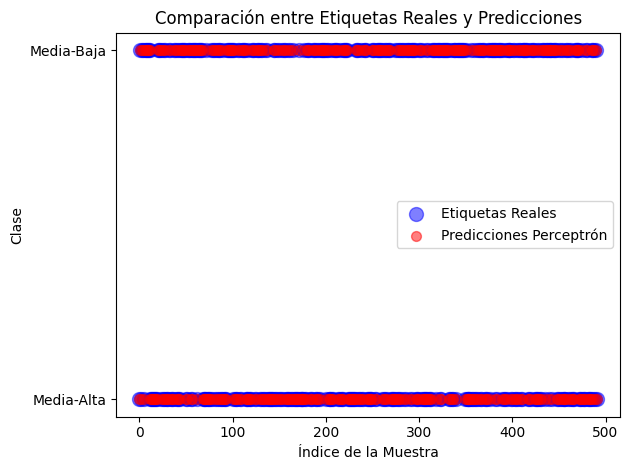

In [9]:

# Handle missing values by filling with the mean of the column
data_set.fillna(data_set.mean(), inplace=True)

# Select relevant features and target variable
nuevo_datset = ["nom_mun", "pobreza_alim_00"]
data_set = data_set[nuevo_datset]

# Discretize the 'pobreza_alim_00' column into categories
bins = [0, 44.447248, 97]
labels = ['Media-Baja', 'Media-Alta']
data_set['Indice de Pobreza'] = pd.cut(data_set['pobreza_alim_00'], bins=bins, labels=labels)

# Encode the 'nom_mun' column
data_set['nom_mun'] = LabelEncoder().fit_transform(data_set['nom_mun'])

# Prepare the features (X) and target variable (Y)
X = data_set.iloc[:, 0:2].values
Y = data_set.iloc[:, 2].values

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalize the features to improve the performance of the perceptron
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the perceptron model
perceptron_model = Perceptron()
perceptron_model.fit(X_train, Y_train)

# Make predictions on the test set
predictions = perceptron_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, predictions)
print("Precisión del modelo de perceptrón:", accuracy)

# Crear un arreglo de índices para las muestras
indices = np.arange(len(Y_test))

# Ancho de las barras
ancho_barra = 0.35

# Predicciones de K-NN
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Etiquetas Reales', alpha=0.5, s=100)

# Predicciones del Perceptrón
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicciones Perceptrón', alpha=0.5, s=50)

plt.xlabel('Índice de la Muestra')
plt.ylabel('Clase')
plt.title('Comparación entre Etiquetas Reales y Predicciones')
plt.legend()
plt.tight_layout()
plt.show()





Precisión del modelo de K-NN: 0.9878048780487805


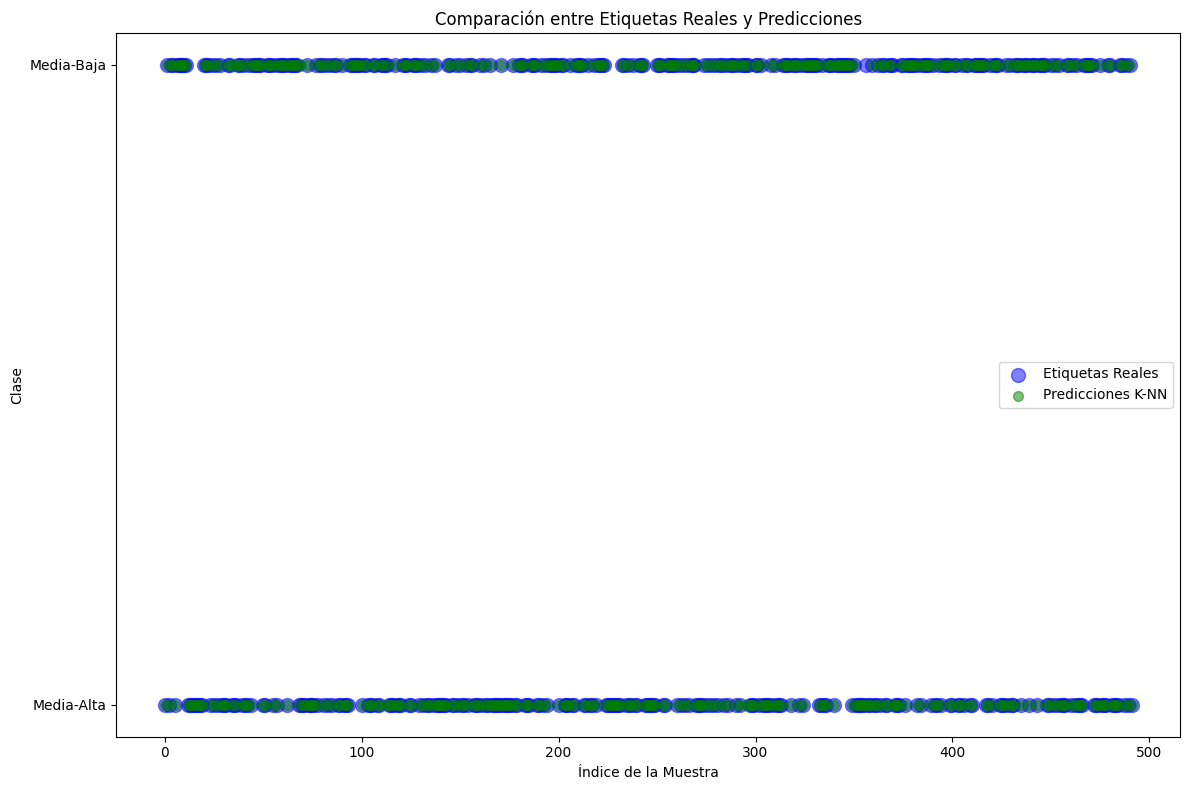

In [8]:

# Crear y entrenar el modelo de K-NN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Puedes ajustar el número de vecinos según sea necesario
knn_model.fit(X_train, Y_train)

# Realizar predicciones con K-NN en el conjunto de prueba
knn_predictions = knn_model.predict(X_test)

# Calcular la precisión del modelo de K-NN
knn_accuracy = accuracy_score(Y_test, knn_predictions)
print("Precisión del modelo de K-NN:", knn_accuracy)

# Visualizar las predicciones del modelo de K-NN y del perceptrón en un solo gráfico
plt.figure(figsize=(12, 8))

# Predicciones de K-NN
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Etiquetas Reales', alpha=0.5, s=100)
plt.scatter(range(len(knn_predictions)), knn_predictions, color='green', label='Predicciones K-NN', alpha=0.5, s=50)

# Predicciones del Perceptrón
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicciones Perceptrón', alpha=0.5, s=50)

plt.xlabel('Índice de la Muestra')
plt.ylabel('Clase')
plt.title('Comparación entre Etiquetas Reales y Predicciones')
plt.legend()
plt.tight_layout()
plt.show()
